# **Forest Cover Type Classification**


## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import warnings

## **Load data**

In [2]:
df = pd.read_csv('/content/forest_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2960.645900,154.127600,13.98120,269.502800,45.596800,2358.805400,212.382200,223.886000,142.892300,1982.005000,...,0.092300,0.078300,0.002000,0.002900,0.000300,0.000500,0.024000,0.02130,0.012300,2.034100
std,276.101899,111.112044,7.44313,214.741609,57.607363,1564.814207,26.560675,19.443395,37.460182,1307.685368,...,0.289463,0.268657,0.044679,0.053776,0.017319,0.022356,0.153057,0.14439,0.110227,1.378016
min,1866.000000,0.000000,0.00000,0.000000,-147.000000,0.000000,70.000000,88.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,2819.000000,57.000000,9.00000,108.000000,6.000000,1106.750000,199.000000,213.000000,120.000000,1041.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,2996.000000,128.000000,13.00000,218.000000,29.000000,2008.000000,218.000000,227.000000,143.000000,1719.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
75%,3162.000000,254.000000,18.00000,390.000000,68.000000,3330.250000,231.000000,238.000000,167.000000,2542.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
max,3846.000000,359.000000,57.00000,1370.000000,573.000000,7023.000000,254.000000,254.000000,247.000000,7080.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000


In [6]:
feature_cols = [str(i) for i in range(54)]
df.columns = feature_cols + ['cover_type']

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,cover_type
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
X

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,0
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,0
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,0
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,0
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3088,217,21,295,53,2912,194,254,190,1590,...,1,0,0,0,0,0,0,0,0,0
9996,2569,129,10,0,0,1273,237,234,127,5094,...,0,0,0,0,0,0,0,0,0,0
9997,2693,21,11,30,6,2316,212,216,139,2110,...,0,0,0,0,0,0,0,0,0,0
9998,2536,42,11,277,19,323,222,216,128,2844,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

,cover_type
0,2
1,1
2,2
3,1
4,2
...,...
9995,2
9996,2
9997,2
9998,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Train :" , X_train.shape)
print("Test :" , X_test.shape)

Train : (8000, 54)
Test : (2000, 54)


In [13]:

print(" Count :", y_train.value_counts().sort_index())

 Count : cover_type
1    2952
2    3901
3     472
4      41
5     129
6     242
7     263
Name: count, dtype: int64


## **Random Forest**

In [14]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1:", f1_score(y_test, y_pred_rf, average = 'weighted'))
print(classification_report(y_test, y_pred_rf, digits=4))

RF accuracy: 0.7995
RF F1: 0.7940952428816531
              precision    recall  f1-score   support

           1     0.8065    0.7791    0.7926       738
           2     0.7989    0.8636    0.8300       975
           3     0.7313    0.8305    0.7778       118
           4     1.0000    0.4000    0.5714        10
           5     0.8571    0.1818    0.3000        33
           6     0.6923    0.4500    0.5455        60
           7     0.9592    0.7121    0.8174        66

    accuracy                         0.7995      2000
   macro avg     0.8350    0.6025    0.6621      2000
weighted avg     0.8017    0.7995    0.7941      2000



## **XGBoost**

In [15]:
majority_class = 2
minority_class = 4

In [16]:
xgb = XGBClassifier(scale_pos_weight = len(y[y == majority_class]) / len(y[y == minority_class]))
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
xgb.fit(X_train, y_train-1, sample_weight=sample_weights)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:33:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred_xgb = xgb.predict(X_test)

In [18]:
print("XGB accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB F1:", f1_score(y_test, y_pred_xgb, average = 'weighted'))
print(classification_report(y_test, y_pred_rf, digits=4))

XGB accuracy: 0.0815
XGB F1: 0.07811189521207759
              precision    recall  f1-score   support

           1     0.8065    0.7791    0.7926       738
           2     0.7989    0.8636    0.8300       975
           3     0.7313    0.8305    0.7778       118
           4     1.0000    0.4000    0.5714        10
           5     0.8571    0.1818    0.3000        33
           6     0.6923    0.4500    0.5455        60
           7     0.9592    0.7121    0.8174        66

    accuracy                         0.7995      2000
   macro avg     0.8350    0.6025    0.6621      2000
weighted avg     0.8017    0.7995    0.7941      2000



## **Confusion Matrix**

### **Random_Forest**

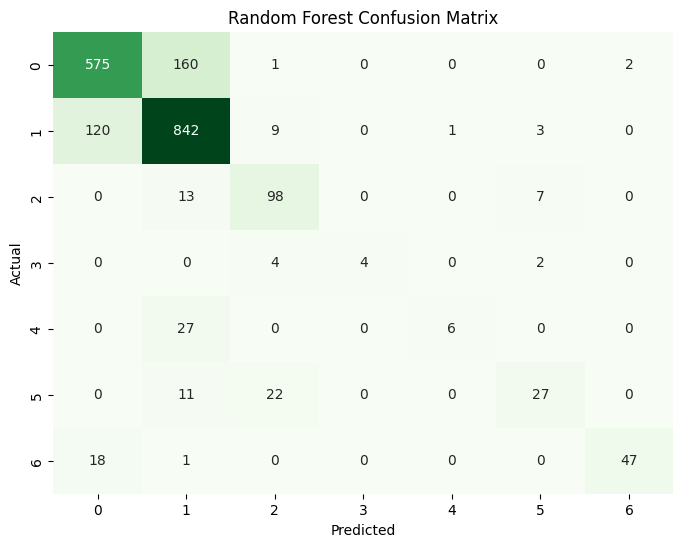

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

### **XGBoost**

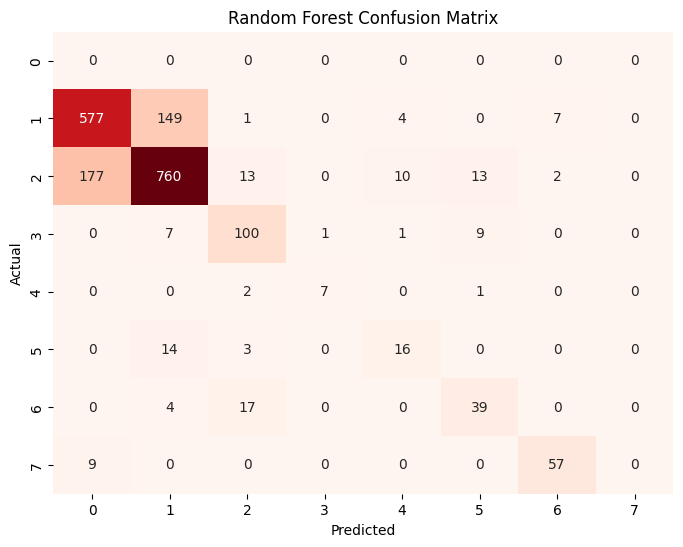

In [20]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## **Feature Importance**

In [21]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
print("Top 10 feature importances:\n", feat_imp.head(10))

Top 10 feature importances:
 0    0.217447
1    0.051064
2    0.042753
3    0.058291
4    0.052079
5    0.088228
6    0.057759
7    0.050796
8    0.049422
9    0.071143
dtype: float64


In [24]:
# Example new data point (replace with actual values)
# Create a dictionary with 54 keys (0 to 53) and initialize values to 0
new_data_dict = {str(i): 0 for i in range(54)}

# Update the dictionary with the known feature values
new_data_dict.update({
    "0": 2750,  # Elevation
    "1": 135,   # Aspect
    "2": 15,    # Slope
    "3": 250,   # Horizontal_Distance_To_Hydrology
    "4": -10,   # Vertical_Distance_To_Hydrology
    "5": 1200,  # Horizontal_Distance_To_Roadways
    "6": 210,   # Hillshade_9am
    "7": 225,   # Hillshade_Noon
    "8": 205,   # Hillshade_3pm
    "9": 750,   # Horizontal_Distance_To_Fire_Points
    # Assuming wilderness area and soil type features are at indices 10-53 and are all 0 for this example
})

new_data = pd.DataFrame([new_data_dict])

In [25]:
# Preprocess the new data using the fitted StandardScaler
new_data_scaled = sc.transform(new_data)

# Predict the forest cover type using the trained XGBoost model
# Add 1 to the prediction to convert back to the original class labels (1-7)
prediction = xgb.predict(new_data_scaled)[0] + 1

# Forest Cover Type Class Mapping:
# 1 → Spruce/Fir
# 2 → Lodgepole Pine
# 3 → Ponderosa Pine
# 4 → Cottonwood/Willow
# 5 → Aspen
# 6 → Douglas-fir
# 7 → Krummholz

print("Predicted Forest Cover Type:", prediction)

Predicted Forest Cover Type: 2
